In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the CSV file into a DataFrame
path = '../WDI_CSV_2024_09_25/WDICSV.csv'
df = pd.read_csv(path)

In [7]:
# Filter rows where the "Country" is "Kazakhstan"
def get_country_df(country: str):
  return df[df['Country Name'] == country]

kazakhstan_df = get_country_df("Kazakhstan")

# Display the filtered DataFrame
kazakhstan_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
221712,Kazakhstan,KAZ,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,93.2,93.4,93.40,93.4,93.4,93.5,93.3,93.1,NaN
221713,Kazakhstan,KAZ,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.7,87.5,88.0,87.85,88.3,88.5,88.6,88.8,88.5,NaN
221714,Kazakhstan,KAZ,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.0,98.0,97.8,97.90,97.9,97.7,97.7,97.5,97.4,NaN
221715,Kazakhstan,KAZ,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.00,100.0,100.0,100.0,100.0,100.0,NaN
221716,Kazakhstan,KAZ,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.00,100.0,100.0,100.0,100.0,100.0,NaN


In [8]:
# Names of columns we can choose
for line in kazakhstan_df["Indicator Name"]:
    print(line)

Access to clean fuels and technologies for cooking (% of population)
Access to clean fuels and technologies for cooking, rural (% of rural population)
Access to clean fuels and technologies for cooking, urban (% of urban population)
Access to electricity (% of population)
Access to electricity, rural (% of rural population)
Access to electricity, urban (% of urban population)
Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)
Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)
Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)
Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)
Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)
Account ownership at

(0.0, 12.446000000000002)

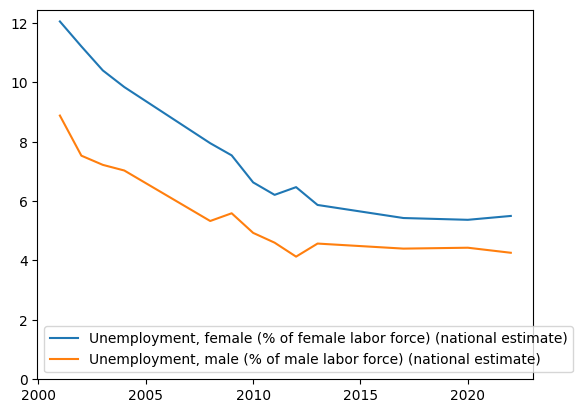

In [39]:
female_unemployment_rate = "Unemployment, female (% of female labor force) (national estimate)"
male_unemployment_rate = "Unemployment, male (% of male labor force) (national estimate)"

year_range = range(1980, 2024)

def getDataVector(label : str, df, year_range=year_range):
  Y = []
  values = df[df["Indicator Name"] == label]
  for year in year_range:
      Y.append(values[f"{year}"])
  return list(map(lambda y: float(y), Y))

kdf = kazakhstan_df

sns.lineplot(x=year_range, y=getDataVector(female_unemployment_rate, kdf), label=female_unemployment_rate)
sns.lineplot(x=year_range, y=getDataVector(male_unemployment_rate, kdf), label=male_unemployment_rate)
plt.ylim(0, None)


In [10]:
# Kazakhstan Electricity prices
# https://www.globalpetrolprices.com/Kazakhstan/electricity_prices/

kzt_per_kwh = 24.010

solar_panel_price_gbp = 42 # 35 without VAT
solar_panel_output_kw = 0.395
solar_panel_output_hours_year = 6 * 365

solar_panel_output_kwh_per_year = solar_panel_output_kw * solar_panel_output_hours_year
print(f"Solar output kWh/year {solar_panel_output_kwh_per_year:.2f}")

gbp_to_kzt = 634.09

solar_profit_per_panel_per_year_gbp = solar_panel_output_kwh_per_year * kzt_per_kwh / gbp_to_kzt
print(f"£{solar_profit_per_panel_per_year_gbp:.2f} GBP")

# Kazakh salary
# https://www.paylab.com/kz/salaries-in-country#:~:text=The%20salary%20range%20of%20employees,salaries%20can%20be%20even%20higher).

kazakh_median_salary = 299804

overhead_gbp = kazakh_median_salary / 12 / gbp_to_kzt

payback_period_years = (solar_panel_price_gbp + overhead_gbp) / solar_profit_per_panel_per_year_gbp
print(f"Payback period: {payback_period_years:.2f}")

target_salary = 40000
panels_needed_for_target_salary = target_salary / solar_profit_per_panel_per_year_gbp

print(f"Panels required for salary: {panels_needed_for_target_salary}")

print(f"Initial investment: £{panels_needed_for_target_salary * solar_panel_price_gbp}")

# Kazakh energy stats
# https://www.enerdata.net/estore/energy-market/kazakhstan/


Solar output kWh/year 865.05
£32.76 GBP
Payback period: 2.49
Panels required for salary: 1221.1739318971024
Initial investment: £51289.305139678305


In [11]:
# After rethinking strategy, Turkey may be a better bet than Kazakhstan

# Good universities for engineers in Turkey:
# - Istanbul technical University
# - Middle East technical University
# - Yildiz technical University
# - a couple private universities

# However, engineers from these Universities may be very expensive

# Minimum wage in Turkey is 20k Lira = £5.36k per year
# https://wageindicator.org/salary/minimum-wage/turkey

# Midnio (discord) estimates median wage at 30k TRY / Month = 360K TRY / Year = £8033 / Year

tdf = get_country_df("Turkiye")
tdf.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
367536,Turkiye,TUR,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,94.8,94.8,95.0,95.0,95.1,95.2,95.3,95.2,95.1,NaN
367537,Turkiye,TUR,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.6,83.8,83.6,83.6,83.5,83.7,83.7,83.6,83.7,NaN
367538,Turkiye,TUR,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.5,99.5,99.5,99.6,99.5,99.6,99.5,99.5,99.5,NaN
367539,Turkiye,TUR,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
367540,Turkiye,TUR,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN



Overview of Energy in Turkey



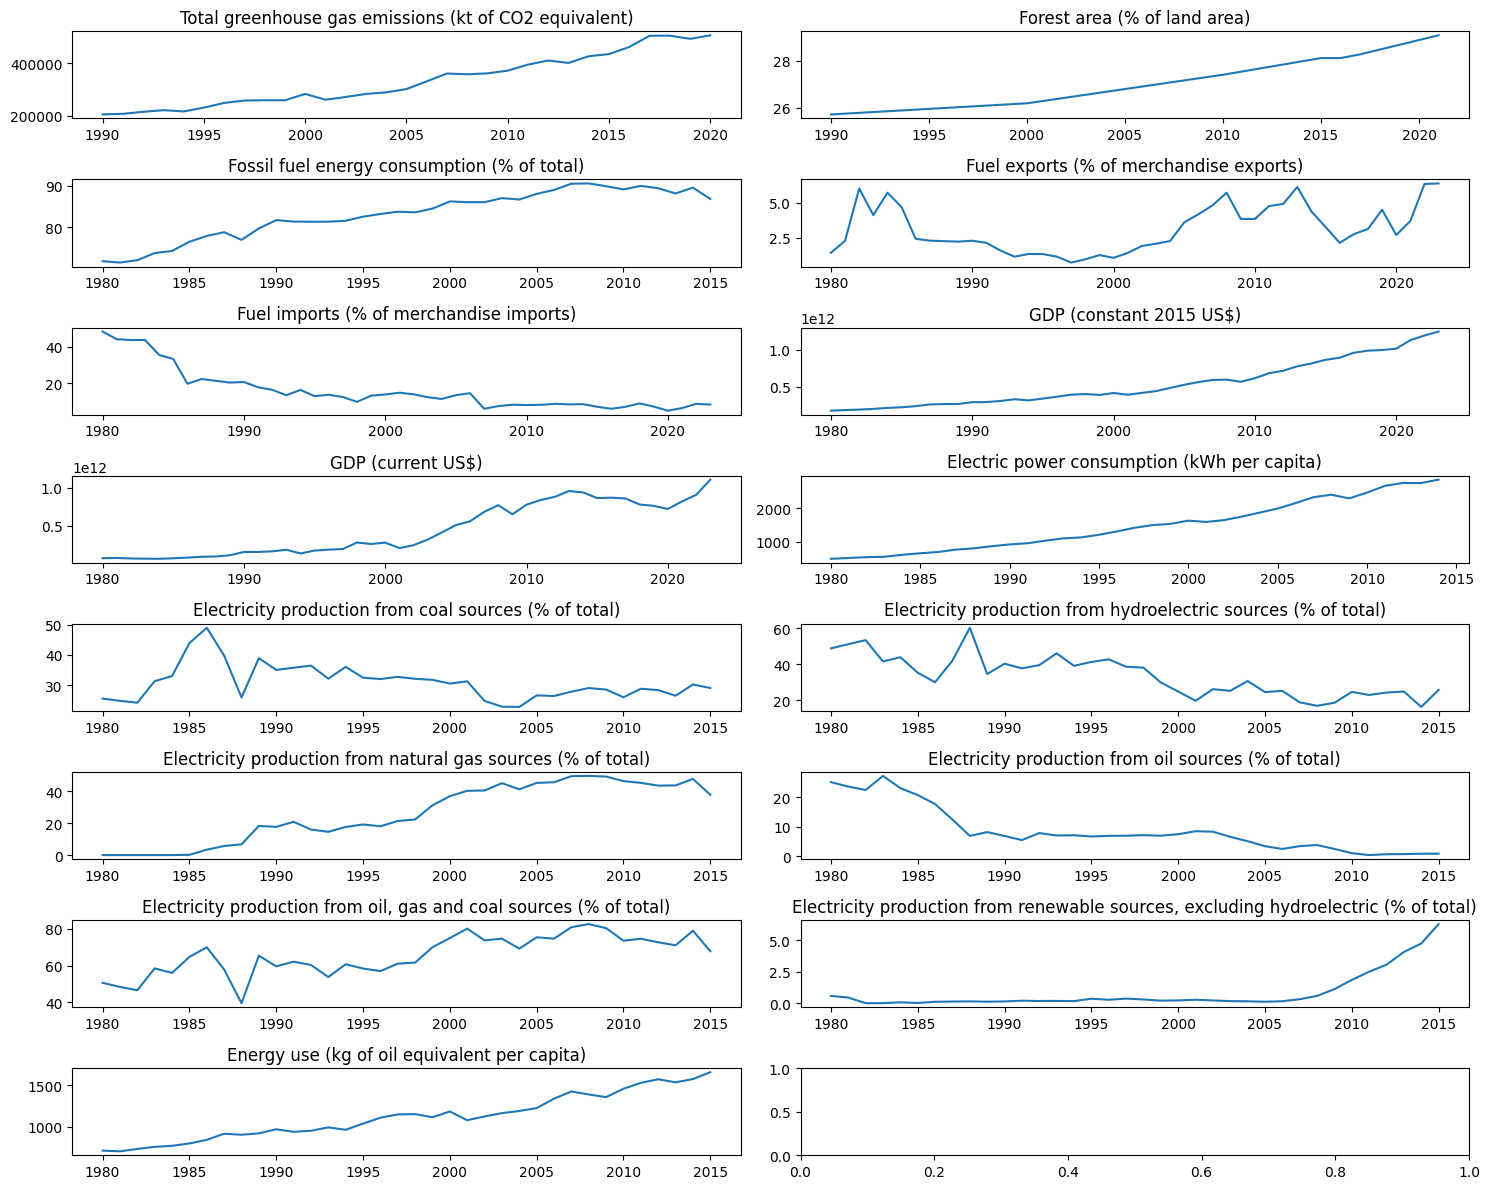

In [12]:
ghg_emissions = "Total greenhouse gas emissions (kt of CO2 equivalent)"
forest_area_percent = "Forest area (% of land area)"
fossil_fuel_consumption_percent = "Fossil fuel energy consumption (% of total)"
percent_of_exports_are_fuel = "Fuel exports (% of merchandise exports)"
percent_of_imports_are_fuel = "Fuel imports (% of merchandise imports)"
gdp_2015_usd = "GDP (constant 2015 US$)"
gdp_usd = "GDP (current US$)"
kwh_consumption_per_capita = "Electric power consumption (kWh per capita)"
electricity_percent_transmission_loss = "Electric power transmission and distribution losses (% of output)"
elec_production_coal_percent = "Electricity production from coal sources (% of total)"
elec_production_hydro_percent = "Electricity production from hydroelectric sources (% of total)"
elec_production_gas_percent = "Electricity production from natural gas sources (% of total)"
elec_production_nuclear_percent = "Electricity production from nuclear sources (% of total)"
elec_production_oil_percent = "Electricity production from oil sources (% of total)"
elec_production_fossil_percent = "Electricity production from oil, gas and coal sources (% of total)"
elec_production_renewable_no_hydro_percent = "Electricity production from renewable sources, excluding hydroelectric (% of total)"
energy_consumption_kg_oil_per_capita = "Energy use (kg of oil equivalent per capita)"
"Electricity production from renewable sources, excluding hydroelectric (kWh)"


labels = [
  ghg_emissions,
  forest_area_percent,
  fossil_fuel_consumption_percent,
  percent_of_exports_are_fuel,
  percent_of_imports_are_fuel,
  gdp_2015_usd,
  gdp_usd,
  kwh_consumption_per_capita,
  # electricity_percent_transmission_loss,
  elec_production_coal_percent,
  elec_production_hydro_percent,
  elec_production_gas_percent,
  # elec_production_nuclear_percent,
  elec_production_oil_percent,
  elec_production_fossil_percent,
  elec_production_renewable_no_hydro_percent,
  energy_consumption_kg_oil_per_capita,
]


print("""
Overview of Energy in Turkey
""")

def plot_labels(labels : list[str], df):
  n = len(labels)

  # Create a nx2 grid of subplots
  fig, axes = plt.subplots((n + 1) // 2, 2, figsize=(15,12))

  # Plot a scatter plot on each axis
  for i in range(n):
    axis = axes[i // 2, i % 2]
    axis.set_title(labels[i])
    sns.lineplot(ax=axis, x=year_range, y=getDataVector(labels[i], tdf))
  plt.tight_layout()
  plt.show()

plot_labels(labels, tdf)


UK transmission loss is way better than Turkey's...
Local transmission could improve this?



<Axes: >

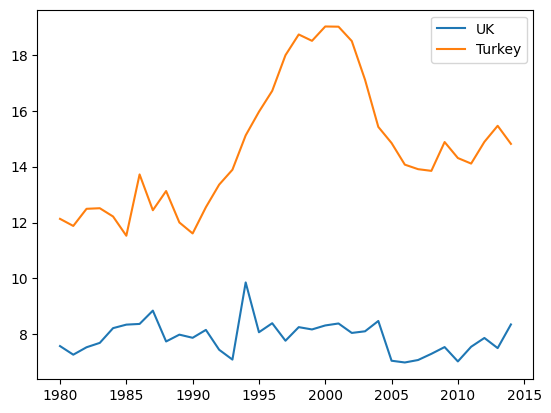

In [13]:
print("""
UK transmission loss is way better than Turkey's...
Local transmission could improve this?
""")
ukdf = get_country_df("United Kingdom")

sns.lineplot(x=year_range, y=getDataVector(electricity_percent_transmission_loss, ukdf), label="UK")
sns.lineplot(x=year_range, y=getDataVector(electricity_percent_transmission_loss, tdf), label="Turkey")


Comparison of different potential markets which are ripe for solar panel installation
(with UK as a control)


Analysis:
 - Turkey is roughly 15 years behind the UK in terms of renewable energy production.     
 - Kazakhstan, Uzbekistan, Tajikistan, Kyrgyz Republic, and Turkmenistan are all at almost 0% renewable energy production.



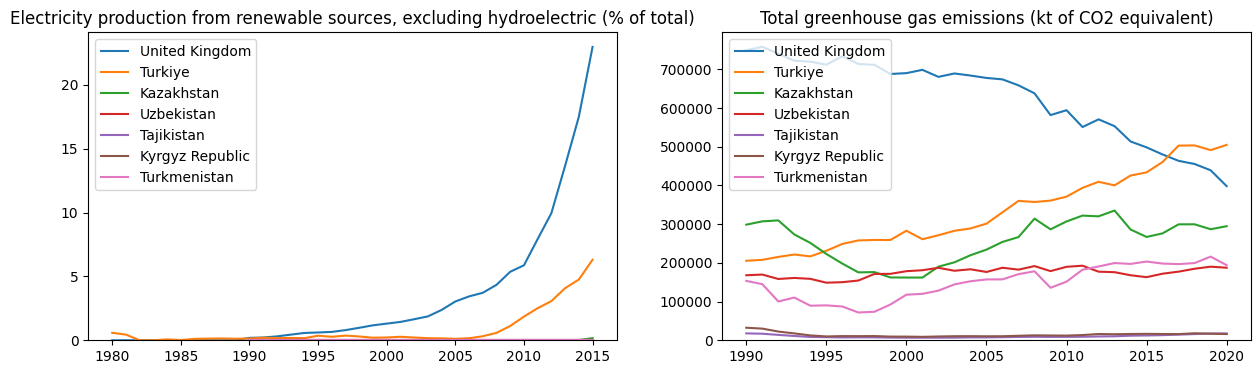

In [14]:
print("""
Comparison of different potential markets which are ripe for solar panel installation
(with UK as a control)
""")

countries = ["United Kingdom", "Turkiye", "Kazakhstan", "Uzbekistan", "Tajikistan", "Kyrgyz Republic", "Turkmenistan"]

country_dfs = {}
for country in countries:
  country_dfs[country] = get_country_df(country)
  assert len(country_dfs[country]) > 0, f"{country} has no data"

labels = [
  elec_production_renewable_no_hydro_percent,
  ghg_emissions,
]

n = len(labels)
fig, axes = plt.subplots((n + 1) // 2, 2, squeeze=False, figsize=(15,4*(n // 2)))
for i in range(n):
  label = labels[i]
  ax = axes[i // 2, i % 2]
  ax.set_title(label)
  for country, country_df in country_dfs.items():
    sns.lineplot(ax=ax, x=year_range, y=getDataVector(label, country_df), label=country)
  ax.set_ylim(0, None)

print("""
Analysis:
 - Turkey is roughly 15 years behind the UK in terms of renewable energy production.     
 - Kazakhstan, Uzbekistan, Tajikistan, Kyrgyz Republic, and Turkmenistan are all at almost 0% renewable energy production.
""")

range(1980, 2024)


(0.0, 788185.83973)

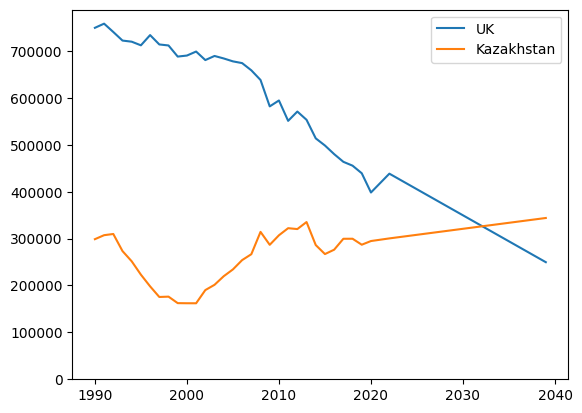

In [46]:
# Forecast of the UK and Kazakhstan's renewable energy production
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import numpy as np

print(year_range)

def get_country_trend(country):
  min_year = 1990
  max_year = 2021
	# Sample yearly data creation
  shrunk_range = range(min_year, max_year)
  X = np.array(shrunk_range).reshape(-1, 1)
  Y = getDataVector(ghg_emissions, country_dfs[country], shrunk_range)

  # Fit a linear regression model
  model = LinearRegression()
  model.fit(X, Y)
  # Predict the trend into the future
  future_X = np.array(range(max_year + 1, 2040)).reshape(-1, 1)
  future_Y = model.predict(future_X)

  return list(X.flatten()) + list(future_X.flatten()), list(Y) + list(future_Y)

ukx, uky = get_country_trend("United Kingdom")
kx, ky = get_country_trend("Kazakhstan")

sns.lineplot(x=ukx,y=uky, label='UK')
sns.lineplot(x=kx, y=ky, label='Kazakhstan')
plt.ylim(0, None)

In [16]:
import sys
print(sys.executable)

# %pip install scikit-learn

C:\Users\Peter Job\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
